In [11]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
EXCLUDE_FIRST_N = 1

sns.set_theme(style="darkgrid")

In [13]:
with open("out/weak_scaling.json") as f:
    weak_multi = json.load(f)

with open("out/strong_scaling.json") as f:
    strong_multi = json.load(f)

with open("out/weak_single_node_scaling.json") as f:
    weak_single = json.load(f)

with open("out/strong_single_node_scaling.json") as f:
    strong_single = json.load(f)

In [14]:
# reshape data into dataframe
# data = {
#       processes": [1, 2, 4, 8, 16, 32, 64],
#      "runs": 5,
#      "time": list of list of times

def reshape(data):
    rows = []
    for p_i, p in enumerate(data["processes"]):
        for i, t in enumerate(data["times"][p_i]):
            rows.append({"processes": p, "run": i, "time": t, "base_size": data["base_size"], "runs": data["runs"]})
    return pd.DataFrame(rows)

In [15]:
weak_multi = reshape(weak_multi)
weak_multi["type"] = "weak"
strong_multi = reshape(strong_multi)
strong_multi["type"] = "strong"

weak_single = reshape(weak_single)
weak_single["type"] = "weak_single"

strong_single = reshape(strong_single)
strong_single["type"] = "strong_single"

strong_multi
weak_multi

,processes,run,time,base_size,runs,type
0,1,0,25.461620,3000,15,weak
1,1,1,24.871348,3000,15,weak
2,1,2,25.227237,3000,15,weak
3,1,3,24.958621,3000,15,weak
4,1,4,24.943443,3000,15,weak
...,...,...,...,...,...,...
100,64,10,98.433547,3000,15,weak
101,64,11,110.365613,3000,15,weak
102,64,12,123.419256,3000,15,weak
103,64,13,121.753959,3000,15,weak


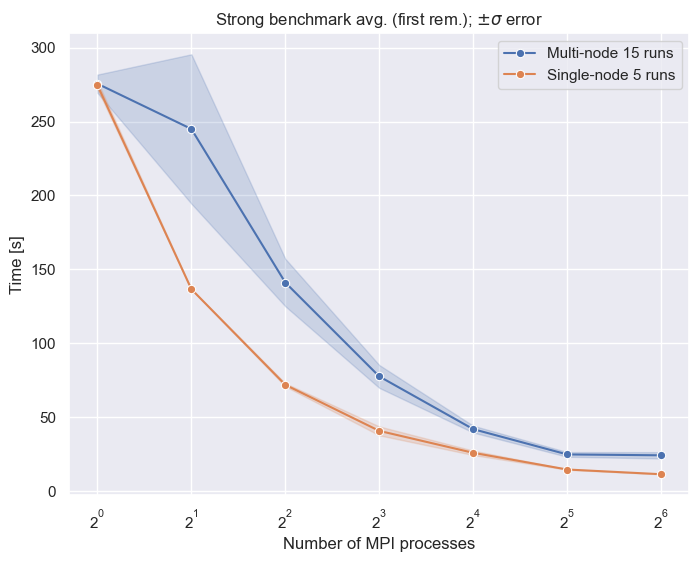

In [16]:
plt.figure(figsize=(8, 6))


def plot_strong(data, label):
    # plot using seaborn lineplot
    sns.lineplot(x="processes", y="time", data=data, errorbar="sd", marker="o", label=label)

plot_strong(strong_multi, "Multi-node 15 runs")
plot_strong(strong_single, "Single-node 5 runs")

plt.xlabel("Number of MPI processes")
# plt.yscale("log")
plt.ylabel("Time [s]")

# add grid
plt.grid(True)
plt.xscale('log', base=2)

plt.title(f"Strong benchmark avg. (first rem.); $\pm\sigma$ error")

plt.savefig(f"../../report/plots/power_strong_scaling.pdf")
plt.show()

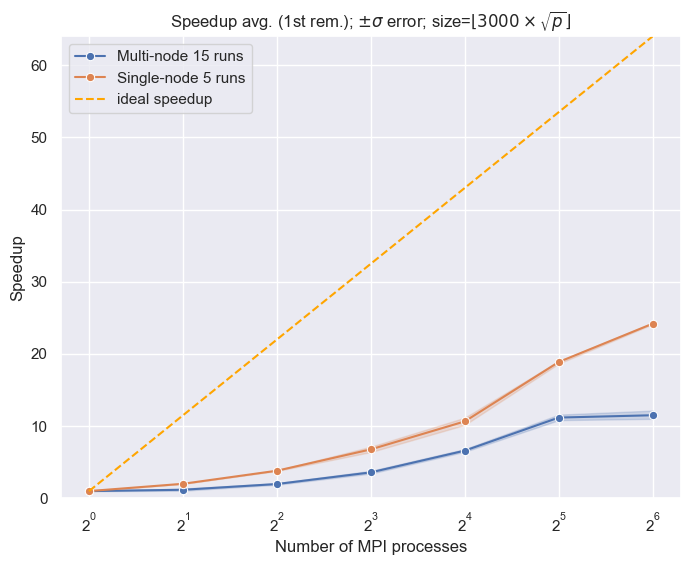

In [17]:
plt.figure(figsize=(8, 6))
base_size = 3000

def plot_speeup(data, label):
    avg_time_single = data[data["processes"] == 1]["time"].mean()
    # calculate speedup (using avg time of # process)
    data["speedup"] = avg_time_single / data["time"]


    sns.lineplot(x="processes", y="speedup", data=data, marker="o", label=label)

plot_speeup(strong_multi, "Multi-node 15 runs")
plot_speeup(strong_single, "Single-node 5 runs")

# add speedup line
plt.plot([1, 64], [1, 64], linestyle="--", color="orange", label="ideal speedup")

plt.xlabel("Number of MPI processes")
plt.ylabel("Speedup")
plt.legend()
plt.ylim(0, 64)
plt.grid(True)
plt.xscale('log', base=2)

plt.title(fr"Speedup avg. (1st rem.); $\pm\sigma$ error; size=$\lfloor {{{base_size}}} \times \sqrt{{p}}\rfloor$")

plt.savefig(f"../../report/plots/power_strong_speedup.pdf")

plt.show()
    

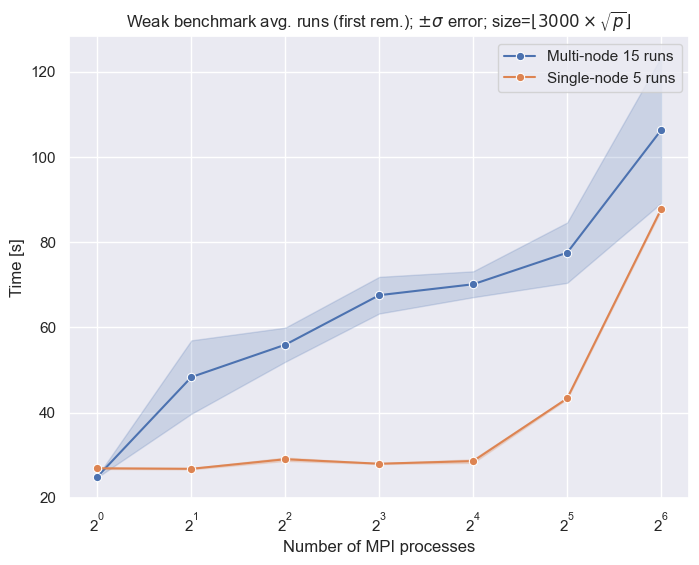

In [18]:
# weak scaling
plt.figure(figsize=(8, 6))

def plot_weak(data, label):
    # plot using seaborn lineplot
    sns.lineplot(x="processes", y="time", data=data, errorbar="sd", marker="o", label=label)

plot_weak(weak_multi, "Multi-node 15 runs")
plot_weak(weak_single, "Single-node 5 runs")

plt.xlabel("Number of MPI processes")
plt.ylabel("Time [s]")
plt.grid(True)
plt.xscale('log', base=2)

plt.title(fr"Weak benchmark avg. runs (first rem.); $\pm\sigma$ error; size=$\lfloor {{{base_size}}} \times \sqrt{{p}}\rfloor$")

plt.savefig(f"../../report/plots/power_weak_scaling.pdf")

plt.show()


In [19]:
weak_multi

,processes,run,time,base_size,runs,type
0,1,0,25.461620,3000,15,weak
1,1,1,24.871348,3000,15,weak
2,1,2,25.227237,3000,15,weak
3,1,3,24.958621,3000,15,weak
4,1,4,24.943443,3000,15,weak
...,...,...,...,...,...,...
100,64,10,98.433547,3000,15,weak
101,64,11,110.365613,3000,15,weak
102,64,12,123.419256,3000,15,weak
103,64,13,121.753959,3000,15,weak


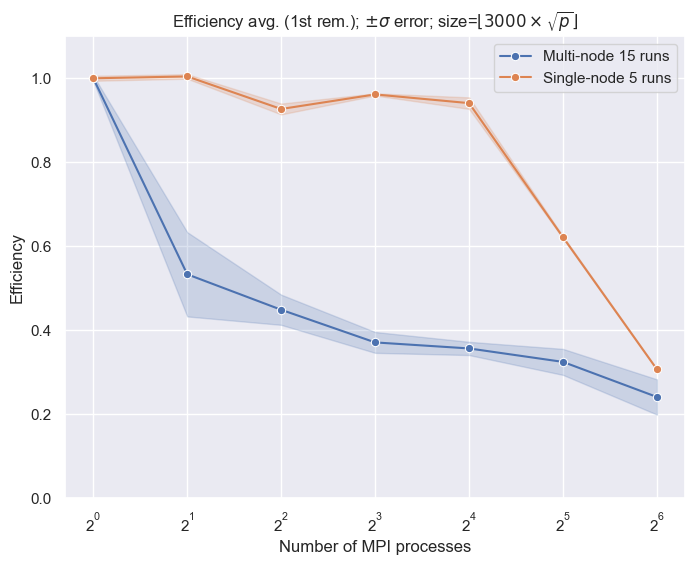

In [20]:
# plot weak scaling efficiency
plt.figure(figsize=(8, 6))

def plot_weak_efficiency(data: pd.DataFrame, label):

    t_1 = data.groupby("processes")["time"].mean().iloc[0]
    # print(t_1)
    # print(data["time"])
    # t(1) / t(p)
    data["efficiency"] = t_1 / data["time"]
    sns.lineplot(x="processes", y="efficiency", data=data, marker="o", label=label, errorbar="sd")


plot_weak_efficiency(weak_multi, "Multi-node 15 runs")
plot_weak_efficiency(weak_single, "Single-node 5 runs")


plt.xlabel("Number of MPI processes")
plt.ylabel("Efficiency")
plt.legend()
plt.ylim(0, 1.1)
plt.xscale('log', base=2)
plt.grid(True)

plt.title(fr"Efficiency avg. (1st rem.); $\pm\sigma$ error; size=$\lfloor {{{base_size}}} \times \sqrt{{p}}\rfloor$")

plt.savefig(f"../../report/plots/power_weak_efficiency.pdf")

plt.show()